In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Scale

In [49]:
from BOF.get_BOF import ImageProcessor
import albumentations as A
import numpy as np

images_path = r"D:\自学计算机\MY_Project\others_work\UNeXt-pytorch\inputs\isic\images"

input_height = 512
input_width = 512

# scale_min = 0.1
# scale_max = 1.0
# scale_list = [round(x * 0.1, 1) for x in range(int(scale_min * 10), int(scale_max * 10) + 1)]
scale_list = np.arange(0.1, 1.02, 0.02)
for scale in scale_list:
    save_pkl_path = f".\\scale_isic\\data\\scale\\{scale}\\bof.pkl"
    height = int(scale * input_height)
    width = int(scale * input_width)
    train_transform = A.Compose([
                A.RandomCrop(height=height, width=width, p=1.0),  # 随机裁剪
                A.Resize(32, 32),  # 调整大小
                A.Normalize(),  # 标准化
            ])
    # print(height, width)
    temp_image_processor = ImageProcessor(image_path=images_path,save_file_path=save_pkl_path, costume_transform=train_transform)

51 51
61 61
71 71
81 81
92 92
102 102
112 112
122 122
133 133
143 143
153 153
163 163
174 174
184 184
194 194
204 204
215 215
225 225
235 235
245 245
256 256
266 266
276 276
286 286
296 296
307 307
317 317
327 327
337 337
348 348
358 358
368 368
378 378
389 389
399 399
409 409
419 419
430 430
440 440
450 450
460 460
471 471
481 481
491 491
501 501
512 512


In [54]:
from BOF.get_BOF import ImageProcessor, CompareBOF

folder = ".\\scale_isic\\data\\scale"
test_BOF = CompareBOF(file_path=folder, target_pkl="bof.pkl", aug_name='scale')

[{'r0': (1.280189980769028, 0.01061422990382413), 'R0': (1.6094931711815896, 0.025023014297784942), 'rk_max_index': (1124.1, 41.719832747081384), 'rk_max': (325.9606455699157, 1.448468041558051), 'Rk_max': (636.9298672307546, 4.225095723190372)}, {'r0': (1.3151286807048972, 0.015802605249731323), 'R0': (1.695034969279673, 0.03772944101647478), 'rk_max_index': (1169.5, 56.20448776071573), 'rk_max': (320.7672536243101, 1.0675036754271408), 'Rk_max': (625.9101157513956, 4.529715941698853)}, {'r0': (1.3472185647156398, 0.011766593882007553), 'R0': (1.77605050045669, 0.028663376757989575), 'rk_max_index': (1215.9, 109.40287422590363), 'rk_max': (315.8218733618353, 0.9654168552416074), 'Rk_max': (615.5653262108924, 5.632998698978287)}, {'r0': (1.3922795172276283, 0.0123583849392328), 'R0': (1.8885713667380313, 0.030674152352462666), 'rk_max_index': (1323, 37.30355955610075), 'rk_max': (313.6249067168967, 1.0564181289559744), 'Rk_max': (606.5005587203815, 3.4077748921608744)}, {'r0': (1.42617

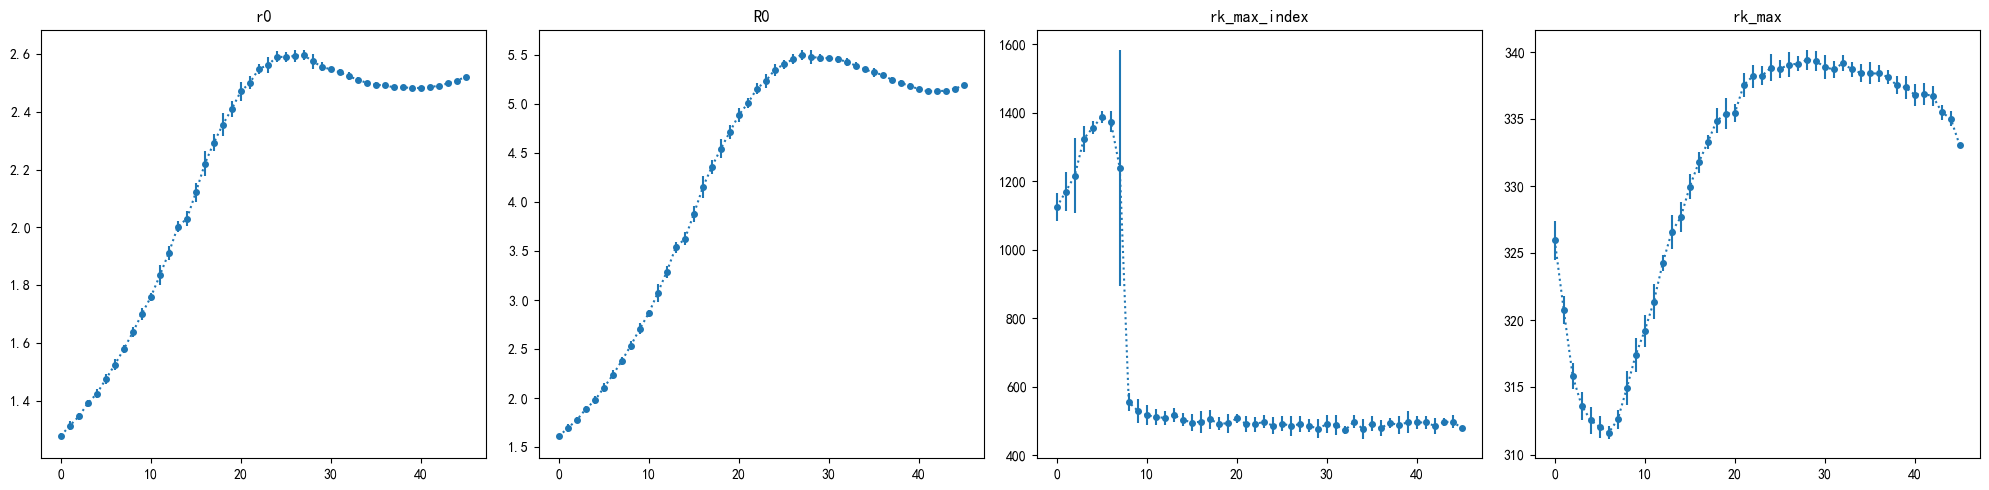

In [56]:
print(test_BOF.comb_BOF)
test_BOF.draw_BOF(net_name="data", aug_name="scale")

## Angle

In [44]:
from BOF.get_BOF import ImageProcessor
import albumentations as A

images_path = r"D:\自学计算机\MY_Project\others_work\UNeXt-pytorch\inputs\isic\images"

input_height = 512
input_width = 512

min_angle_list = range(135,181,1)
# for min_angle in tqdm(min_angle_list, unit="degree", desc="min_angle"):
for max_angle in min_angle_list:
    # min_angle = -max_angle
    save_pkl_path = f".\\scale_isic\\data\\angle\\{max_angle}\\bof.pkl"
    # height = int(scale * input_height)
    # width = int(scale * input_width)
    train_transform = A.Compose([
                # A.RandomCrop(height=height, width=width, p=1.0),  # 随机裁剪
                A.Rotate(limit=max_angle),  # 角度旋转增强，可设置旋转角度的限制
                A.Resize(32, 32),  # 调整大小
                A.Normalize(),  # 标准化
            ])

    temp_image_processor = ImageProcessor(image_path=images_path,save_file_path=save_pkl_path, costume_transform=train_transform)

[{'r0': (2.5207437975895033, 0.0), 'R0': (5.189049374353965, 0.0), 'rk_max_index': (479, 0.0), 'rk_max': (333.0478952696483, 0.0), 'Rk_max': (644.7883110555906, 0.0)}, {'r0': (2.5181813800317263, 0.00037359412593439734), 'R0': (5.178415522112501, 0.001204657603287164), 'rk_max_index': (518.4, 17.276830985134076), 'rk_max': (332.32115462455624, 0.8429159845561759), 'Rk_max': (640.5994829092434, 2.197463192601682)}, {'r0': (2.5183101276171507, 0.0007552648276489413), 'R0': (5.179882783122431, 0.0028790594871734823), 'rk_max_index': (517.7, 16.472536065962778), 'rk_max': (332.57746952378204, 0.4837555581234268), 'Rk_max': (640.8872653712298, 1.9128060353094034)}, {'r0': (2.5181488257633045, 0.0009611423145192412), 'R0': (5.180209688568283, 0.00352820225403524), 'rk_max_index': (497.1, 22.575552165020362), 'rk_max': (332.5228605764302, 0.4322358366087922), 'Rk_max': (643.3409286816495, 2.558090610468391)}, {'r0': (2.5173680688267486, 0.000669542123005274), 'R0': (5.179251760287382, 0.00284

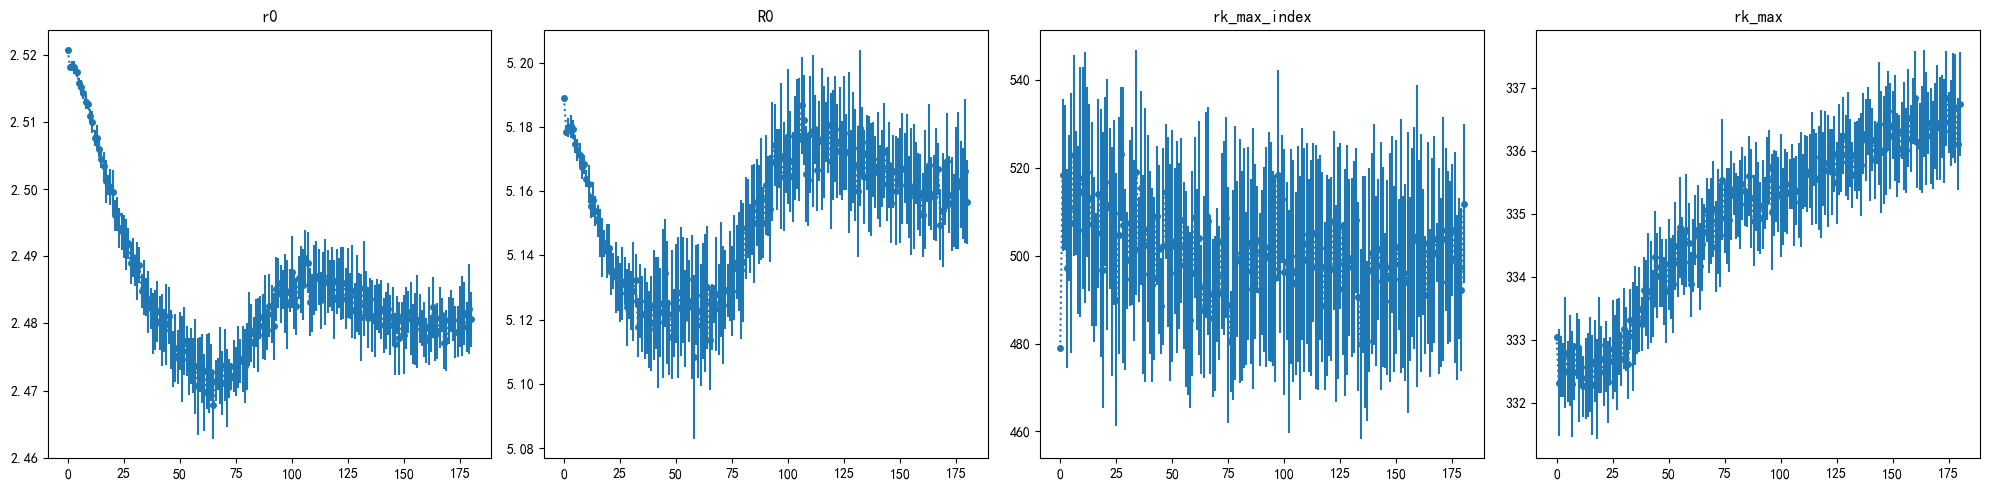

In [45]:
from BOF.get_BOF import ImageProcessor, CompareBOF

folder = ".\\scale_isic\\data\\angle"
test_BOF = CompareBOF(file_path=folder, target_pkl="bof.pkl", aug_name='scale')

print(test_BOF.comb_BOF)
test_BOF.draw_BOF(net_name="data", aug_name="angle")

# Croop

In [2]:
from BOF.get_BOF import ImageProcessor
import albumentations as A

images_path = r"D:\自学计算机\MY_Project\others_work\dataset\ISIC2018\train_folder\images"

input_height = 512
input_width = 512

for scale in range(1, 11):  # Loop from 1 to 10 (inclusive)
    scale_factor = scale / 10.0  # Scale factor from 0.1 to 1.0

    # Calculate crop size based on scale factor
    crop_size = int(min(input_height, input_width) * scale_factor)

    save_pkl_path = f".\\scale_isic\\data\\crop\\{scale}\\croop_{scale_factor}\\bof.pkl"

    train_transform = A.Compose([
        A.RandomCrop(height=crop_size, width=crop_size, p=1.0),
        A.Normalize(),
    ])

    temp_image_processor = ImageProcessor(image_path=images_path, save_file_path=save_pkl_path, costume_transform=train_transform)